# Image Classification of Fruits

## Project Overview

This project focuses on classifying images of three fruit types: peaches, pomegranates, and strawberries. Utilizing a Convolutional Neural Network (CNN) built with TensorFlow and Keras, the model aims to accurately identify the fruit type in a given image.

## Dataset

The dataset comprises 811 images distributed across three classes:

- **Peaches**
- **Pomegranates**
- **Strawberries**

The data is split into training and validation sets to evaluate the model's performance effectively.

## Model Architecture

The CNN model consists of the following layers:

1. **Convolutional Layers:** Three layers with 32, 64, and 128 filters, respectively, each followed by ReLU activation and MaxPooling.
2. **Flatten Layer:** Converts the 2D matrices into a 1D vector.
3. **Dense Layers:** Two fully connected layers; the first with 128 neurons and ReLU activation, and the second with 3 neurons and softmax activation for output classification.

## Preprocessing

Images are resized to 224x224 pixels and normalized to enhance model performance. Data augmentation techniques such as rotation, zoom, and horizontal flipping are applied to improve generalization.

## Training

The model is compiled with the Adam optimizer and trained using sparse categorical cross-entropy loss. Training is conducted over 25 epochs with a batch size of 32. The dataset is shuffled and batched appropriately to ensure effective learning.

## Evaluation

Performance is assessed using accuracy metrics and visualized through confusion matrices and classification reports. The model achieves an accuracy of approximately 100% on the validation set, But data is not enough to produce good results on new data.

## Usage

To use the model for predictions:

1. Load the trained model.
2. Preprocess the input image to match the training data.
3. Use the model to predict the class of the input image.

## Future Work

Planned improvements include:

- Expanding the dataset to include more fruit classes.
- Implementing advanced data augmentation techniques.
- Fine-tuning the model to enhance generalization.
-Increase input image size if you want to train the model with more details in the image but may increase training time.
-Scaling pixel values to a standard range, such as [0, 1] or [-1, 1], can improve convergence during training.
-Adjusting the contrast can make important features more distinguishable, aiding the model in learning relevant patterns.

UNZIP THE DATASET

In [1]:
# Install unzip if not already installed
!apt-get install unzip

# Unzip the file
!unzip -q '/content/fruits_data.zip' -d '/content/extracted_dataset'


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-26ubuntu3.2).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

RESIZE THE IMAGES

In [3]:
dataset_directory = '/content/extracted_dataset/fruits_data'
batch_size = 32
img_height = 224
img_width = 224

train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_directory,
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=42
)

class_names = train_ds.class_names
print(class_names)


Found 811 files belonging to 3 classes.
['peaches', 'pomegranates', 'strawberries']


PLOT A FEW IMAGES

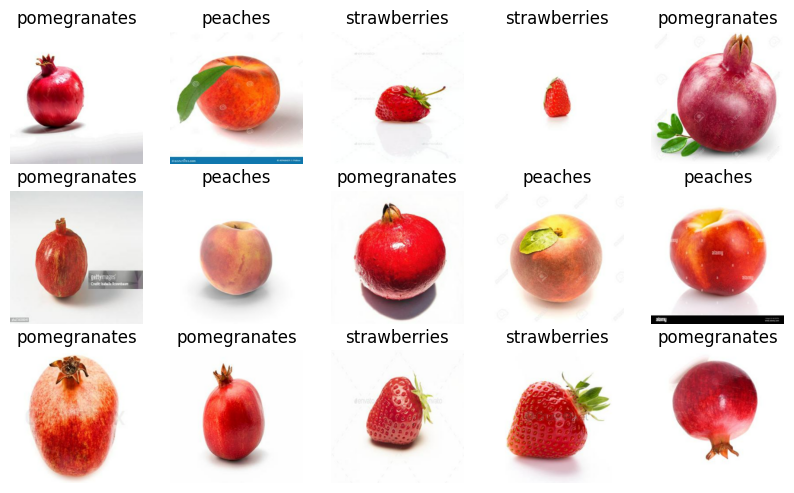

In [4]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(15):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()


In [5]:
from tensorflow.keras import models, layers
import warnings
warnings.filterwarnings('ignore')

CONSTRUCT CNN LAYERS

In [6]:
model=models.Sequential([
    layers.Conv2D(32,(3,3), activation='relu', input_shape= (224,224,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128,(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')
])

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

ASSIGN OTIMIZER, LOSS FUNCTION & METRICS

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

SPLIT THE DATA

In [9]:
dataset = train_ds.unbatch()
dataset = dataset.shuffle(buffer_size=811, seed=42)
total = 811  # total number of images
train_count = int(0.8 * total)
val_count = total - train_count

train_dataset = dataset.take(train_count).batch(batch_size)
val_dataset = dataset.skip(train_count).batch(batch_size)


TRAIN THE NETWORK

In [16]:
model.fit(train_dataset, epochs=35, validation_data=val_dataset)

Epoch 1/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.9150 - loss: 0.3017 - val_accuracy: 0.9632 - val_loss: 0.1198
Epoch 2/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.9593 - loss: 0.1624 - val_accuracy: 0.9509 - val_loss: 0.1510
Epoch 3/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.9425 - loss: 0.1957 - val_accuracy: 0.9755 - val_loss: 0.0763
Epoch 4/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.9704 - loss: 0.1064 - val_accuracy: 0.9816 - val_loss: 0.0833
Epoch 5/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.9621 - loss: 0.1066 - val_accuracy: 0.9571 - val_loss: 0.0900
Epoch 6/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.9815 - loss: 0.0643 - val_accuracy: 0.9877 - val_loss: 0.0499
Epoch 7/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.9799 - loss: 0.0545 - val_accuracy: 0.9632 - val_loss: 0.1003
Epoch 8/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.9844 - loss: 0.0420 - val_accuracy: 0.9877 -

EVALUATE THE MODEL

In [17]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Assuming test_ds is your test (or validation) tf.data.Dataset
# It should yield batches of (images, labels)
y_true = []
y_pred = []

for images, labels in val_dataset:
    # Get model predictions (probabilities)
    preds = model.predict(images)
    # Convert predictions to class indices
    preds_indices = np.argmax(preds, axis=1)
    # Append true labels and predicted labels
    y_true.extend(labels.numpy())
    y_pred.extend(preds_indices)

# Convert lists to numpy arrays (optional)
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_names))

# Print confusion matrix
print(confusion_matrix(y_true, y_pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
              precision    recall  f1-score   support

     peaches       1.00      1.00      1.00        47
pomegranates       1.00      1.00      1.00        64
strawberries       1.00      1.00      1.00        52

    accuracy                           1.00       163
   macro avg       1.00      1.00      1.00       163
weighted avg       1.00      1.00      1.00       163

[[47  0  0]
 [ 0 64  0]
 [ 0  0 52]]


Here model performs very good but it may not generalizes well on new data as training data is not enough and we don't do any preprocessing.

In [30]:
# Load the image
img_path = '/content/peachh.jpg'
img = tf.keras.utils.load_img(img_path, target_size=(224, 224))

# Convert the image to an array
img_array = tf.keras.utils.img_to_array(img)

# Expand dimensions to match the model's input shape
img_array = np.expand_dims(img_array, axis=0)

# Make a prediction
predictions = model.predict(img_array)

# Apply softmax to get probabilities
probabilities = tf.nn.softmax(predictions[0])

# Get the index of the highest probability
predicted_class_index = np.argmax(probabilities)

# Map the index to the class name
predicted_class_name = class_names[predicted_class_index]

print(f"This image most likely belongs to {predicted_class_name} with a {100 * np.max(probabilities):.2f}% confidence.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
This image most likely belongs to peaches with a 57.61% confidence.


I given some new images but model performs ok but not that accurate further steps needed to reduce overfitting and improve generalization.